In [1]:
import json
import helpers.functions as h

In [2]:
# Load assets
with open('config_test.json') as file:
    asset_names = json.load(file)

retrieving PSQ data
[*********************100%***********************]  1 of 1 completed
retrieving SQS data
[*********************100%***********************]  1 of 1 completed
df joined
retrieving SQQQ data
[*********************100%***********************]  1 of 1 completed
df joined


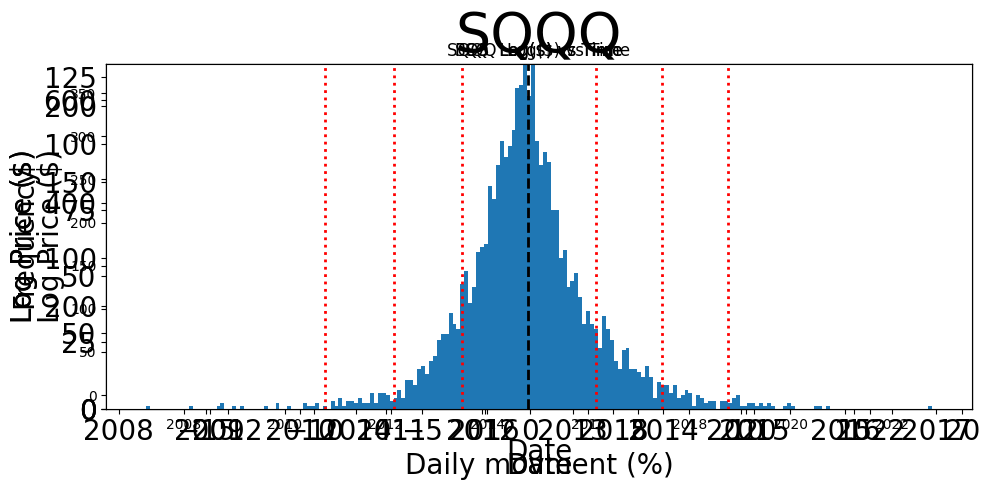

In [3]:
# Iterate over assets, retrive data and make calculations.

# Underlaying assets
for count, index in enumerate(asset_names["indices"]):
    # Derivatives of underlaying assets
    for ticker in asset_names["indices"][index]["Derivatives"]:
        print(f'retrieving {ticker} data')

        # Retrive price data
        df = h.getData(ticker)

        # Check dataframe is populated
        if len(df) > 0:
            # Plot price and logged price vs time 
            h.price_vs_time(df, ticker, log = False)
            h.price_vs_time(df, ticker, log = True)

            # Calculate largest peak to trough drawdown in dataframe
            drawdown_df = h.largestDrawDown(df)

            # Plot daily price movement distribution.
            daily_distribtion = h.distribution_plot(df, ticker)

            # Aggregate to compare accross assets
            sm_df = df[['Date', 'Log Close']]
            try:
                comparison_df = h.composite_dataframe(comparison_df, sm_df, ticker)
                #comparison_df.head()

            except:
                #comparison_df = df[['Date', 'Log Close']]
                comparison_df = sm_df.rename(columns={"Log Close": f"{ticker}_Log_Close"})
                #comparison_df.head()
                
        else:
            print('Dataframe Empty')

In [4]:
comparison_df

,Date,Open,High,Low,Close,Adj Close,Volume,timestamp,PSQ_Log_Close,Percentage,SQS_Log_Close,SQQQ_Log_Close
0,2006-06-21,274.480011,274.480011,274.480011,274.480011,229.511414,50,2006-06-21,5.614878,1.000000,NaN,NaN
1,2006-06-22,276.519989,279.480011,276.519989,279.200012,233.458099,3650,2006-06-22,5.631928,1.009692,NaN,NaN
2,2006-06-23,280.799988,280.799988,277.839996,279.160004,233.424652,4175,2006-06-23,5.631785,0.994160,NaN,NaN
3,2006-06-26,279.239990,280.480011,278.760010,279.200012,233.458099,4050,2006-06-26,5.631928,0.999857,NaN,NaN
4,2006-06-27,279.200012,284.799988,279.200012,284.600006,237.973358,15675,2006-06-27,5.651085,1.019341,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4303,2023-07-27,10.230000,10.450000,10.190000,10.420000,10.420000,47335000,2023-07-27,2.343727,1.018573,NaN,2.886475
4304,2023-07-28,10.300000,10.320000,10.200000,10.220000,10.220000,34295500,2023-07-28,2.324347,0.992233,NaN,2.830858
4305,2023-07-31,10.220000,10.260000,10.190000,10.230000,10.230000,29876200,2023-07-31,2.325325,1.000978,NaN,2.827905
4306,2023-08-01,10.270000,10.310000,10.230000,10.260000,10.260000,28243500,2023-08-01,2.328253,0.999026,NaN,2.836737


In [ ]:
t1 = 'PSQ'

df1 = h.getData(t1)
col_name = f"{t1}_Log_Close"
df1 = df1.rename(columns={"Log Close": col_name})
df1 = df1[['Date', col_name]]

t2 = 'SQQQ'
df2 = h.getData(t2)
col_name2 = f"{t2}_Log_Close"
df2 = df2.rename(columns={"Log Close": col_name2})
df2 = df2[['Date', col_name2]]



In [ ]:
df = pd.merge(df1, df2, on='Date', how='inner')

In [ ]:
import pandas as pd
def composite_dataframe(df_1, df_2, df_2_ticker):
    col_name = f"{df_2_ticker}_Log_Close"
    df_2 = df_2.rename(columns={"Log Close": col_name})
    df = pd.merge(df_1, df_2, on='Date', how='inner')
    return df


#df1_sm = df1[['Date', 'Log Close']]
#df1_sm

In [ ]:
df